### OBJECTIVE: 
If a new review given, to predict whether it belongs to positive class or negative class.

We have a dataset which contains both positive as well as negative reviews. 
**By applying t-SNE** , we will try to differentiate between positive class and negative class  --- similar to EDA.



### STEPS

1. Loading the dataset
2. Applying text-preprocessing operations on it
3. Creating a Bag of model
4. Applying t-SNE model on the data to visualize which are positive reviews and which are negative reviews

In [1]:
import pandas as pd

In [2]:
reviews_dataset = pd.read_csv('Reviews.csv')

In [3]:
reviews_dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
#rows and columns of our dataframe
reviews_dataset.shape

(568454, 10)

In [5]:
reviews_dataset.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
def scoreChange(score):
    if score > 3:
        return 'positive'
    elif score < 3:
        return 'negative'
    else:
        return score

In [7]:
reviews_dataset['Score'] = reviews_dataset['Score'].apply(scoreChange)

In [8]:
reviews_dataset['Score'].value_counts()

positive    443777
negative     82037
3            42640
Name: Score, dtype: int64

In [9]:
reviews_dataset.shape

(568454, 10)

In [10]:
reviews_dataset = reviews_dataset[reviews_dataset['Score']!=3]

In [11]:
reviews_dataset.shape

(525814, 10)

In [12]:
reviews_dataset['Score'].value_counts()

positive    443777
negative     82037
Name: Score, dtype: int64

In [13]:
reviews_dataset.shape

(525814, 10)

### Data Cleaning 

#### De-duplication 
 Removing the duplicates

In [14]:
sorted_dataframe = reviews_dataset.sort_values(by = 'ProductId', axis=0, inplace=False, kind = 'quicksort')

In [15]:
sorted_dataframe

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
150507,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
150508,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...
150510,150511,0006641040,A1C9K534BCI9GO,Laura Purdie Salas,0,0,positive,1344211200,Charming and childlike,"A charming, rhyming book that describes the ci..."
150511,150512,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,positive,1338249600,Must have.,I set aside at least an hour each day to read ...
150512,150513,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,positive,1325721600,A classic,I remembered this book from my childhood and g...
150513,150514,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,positive,1313884800,Chicken soup with Rice,It's a great book with adorable illustrations....
150514,150515,0006641040,A2RTT81R6Y3R7X,Lindylu,0,0,positive,1303171200,One of our family's favorite books,This book is a family favorite and was read to...


In [16]:
reviews_final_dataset = sorted_dataframe.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep='first',inplace=False) #if we dont use subset, it will search for duplicates in all columns

In [17]:
reviews_final_dataset.shape

(364173, 10)

In [18]:
#we know HelpfulnessNumerator <= HelpfulnessDenominator
reviews_final_dataset = reviews_final_dataset[reviews_final_dataset.HelpfulnessNumerator <= reviews_final_dataset.HelpfulnessDenominator]

In [19]:
reviews_final_dataset.shape

(364171, 10)

Applying various **text preprocessing techniques** - 

1.stemming

2.removing stopwords

3.converting into lowercase

In [20]:
import re
import string
import nltk
from nltk.corpus import stopwords #nltk -natural language processing toolkit which contains all the modules,functions related to nltk
from nltk.stem import PorterStemmer,SnowballStemmer #These both are stemming modules, we can use any of them
from nltk.stem.wordnet import WordNetLemmatizer #This is lemmatizer modue

In [21]:
#stop_words will store all stop words in english
stop_words = set(stopwords.words("english"))

In [22]:
#stemming - getting the rootword of the given word , for ex:- tasty --- root word for this word is 'tasti'

stemmer = nltk.stem.SnowballStemmer('english')

In [23]:
def cleanHTML(sentence):
    '''This functions removes any HTML tag present in text column in the dataset'''
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext


#re.sub() --to find and replace a part of a string using regular expressions

  #The optional count argument is the exact number of replacements to make in the input string, 
  #and if this is value is less than or equal to zero, then every match in the string is replaced.

#Method
  #replacedString = re.sub(pattern, replacement_pattern, input_str, count, flags=0)
    
#re.compile()    
    
#In Python, creating a new regular expression pattern to match many strings can be slow, 
#  so it is recommended that you compile them if you need to be testing or extracting information from many input strings 
#                                                                                             using the same expression. 

#This method returns a re.RegexObject - regular expression object

In [24]:
def cleanpunctuation(sentence): 
    '''function to clean the word of any punctuation or special characters'''
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

#Method
  #replacedString = re.sub(pattern, replacement_pattern, input_str, count, flags=0)

Applying all the three text preprocessing techniques - 'Stemming','Lowercase','removing stopwords'

In [25]:
index=0
string=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews in this list
all_negative_words=[] # store words from -ve reviews in this list
stem=''
for sentence in reviews_final_dataset['Text'].values:
    filtered_sentence=[]
    sentence=cleanHTML(sentence) # remove HTMl tags
    for words in sentence.split():
        for cleaned_words in cleanpunctuation(words).split(): #remove punctuations
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop_words):
                    stem=(stemmer.stem(cleaned_words.lower()))
                    filtered_sentence.append(stem)
                    if (reviews_final_dataset['Score'].values)[index] == 'positive': 
                        all_positive_words.append(stem) #list of all words used to describe positive reviews
                    if(reviews_final_dataset['Score'].values)[index] == 'negative':
                        all_negative_words.append(stem) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 

    string = " ".join(filtered_sentence) #final string of cleaned words 'b' given we are appending to bytes

    
    final_string.append(string)
    index+=1

In [26]:
reviews_final_dataset['Cleaned_text'] = final_string

### Bag Of Words (BoW)
creating a 'Bag of Words' model and then applying t-SNE for visualization

In [34]:
#We will apply bag_of_words technique to our final_reviews_dataset of cleaned_tect column  - which is our cleaned dataset

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer() 

#storing this function in a variable count_vect. 
#CountVectorizer returns Convert a collection of text documents to a matrix of token counts
#This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

In [35]:
bag_of_words_model = count_vect.fit_transform(reviews_final_dataset['Cleaned_text'])

In [36]:
type(bag_of_words_model)

scipy.sparse.csr.csr_matrix

In [37]:
bag_of_words_model.shape

(364171, 71624)

In [38]:
#we are selecting a sample of 15k observations out of 364171 observations

bow_data_15k = bag_of_words_model[:15000]

In [41]:
bow_data_15k.shape

(15000, 71624)

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt


In [61]:
data_10k = bag_of_words_model[:10000,:1000]

In [62]:
data_10k.shape

(10000, 1000)

In [55]:
#taking corresponding 10000 values of scores feature
#This variable is used for all the models we create 
#                             -it will not change because we take 10000 observations for all models we create

score_labels_10k = reviews_final_dataset['Score'][:10000]


### Applying t-SNE
applying t-SNE on reviews_final_dataset to determine whether reviews are +ve or -ve



We are not applying column standardisation or normalization because we are finding the counts(term frequency).Even though when finding nearest neighbors it calculates distance if values in corresponding columns in two vectors are almost same then, both vectors will be closer and there is high probability that both the vectors belong to same category(either positive or negative) 

In [66]:
import numpy as np
from sklearn.manifold import TSNE
#T-SNE is a tool to visualize the high dimensional data
#n-components = number of dimensions
tsne_model_1 = TSNE(n_components=2,n_iter=1000,perplexity=50,random_state=0)

1.**perplexity** = 50 , **number of iterations(steps) = 1000**

In [68]:

tsne_data = tsne_model_1.fit_transform(data_10k.toarray())

#print(tsne_data)

print(f"tsne_data.shape : {tsne_data.shape}")


print(f"score_labels_10k.shape : {score_labels_10k.shape}")

tsne_data_stack = np.vstack((tsne_data.T,score_labels_10k)).T

tsne_df = pd.DataFrame(tsne_data_stack,columns=("Dim1","Dim2","labels"))
#creating dataframe to plot clearly.

tsne_data.shape : (10000, 2)
score_labels_10k.shape : (10000,)


In [69]:
sns.FacetGrid(tsne_df,hue = 'labels',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()

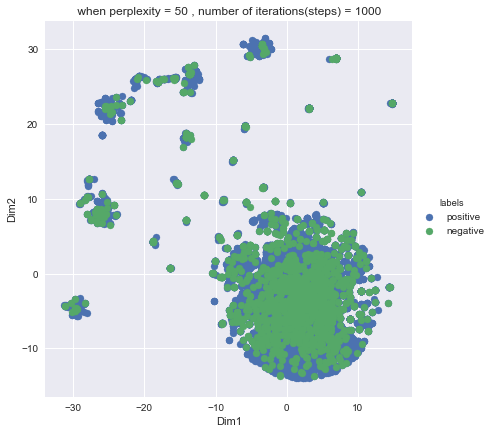

In [70]:
plt.title(" when perplexity = 50 , number of iterations(steps) = 1000 ")
plt.show()

#### Trying with different iterations(steps) and perplexity


2 . **perplexity** = 50 , **number of iterations(steps) = 5000**

    Number of iterations has been increased from 1000 to 5000

In [85]:
tsne_model_2 = TSNE(n_components=2,n_iter=5000,perplexity=50,random_state=0)

In [86]:
tsne_data_2 = tsne_model_2.fit_transform(data_10k.toarray()) #applying model to the data and transforming it 

tsne_data_stack_2 = np.vstack((tsne_data_2.T,score_labels_10k)).T #appending labels

tsne_df_2 = pd.DataFrame(tsne_data_stack_2,columns=("Dim1","Dim2","labels")) #creating dataframe

In [87]:
sns.FacetGrid(tsne_df_2,hue = 'labels',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()

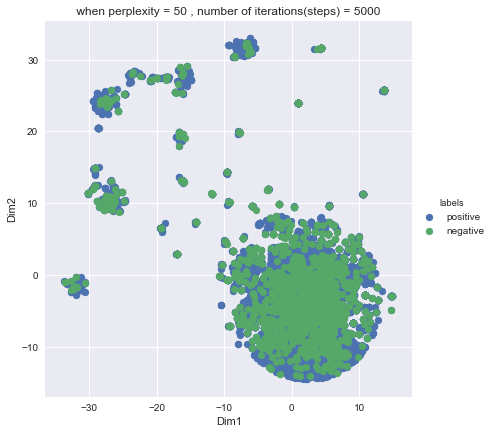

In [88]:
plt.title(" when perplexity = 50 , number of iterations(steps) = 5000 ")
plt.show()

 3 . **perplexity** = 70 , **number of iterations(steps) = 5000**
 
 Changing Perplexity
 
 Number of iterations -- unchanged

In [94]:
tsne_model_3 = TSNE(n_components=2,n_iter=5000,perplexity=70,random_state=0)

In [95]:
tsne_data_3 = tsne_model_3.fit_transform(data_10k.toarray()) #applying model to the data and transforming it 

tsne_data_stack_3 = np.vstack((tsne_data_3.T,score_labels_10k)).T #appending labels

tsne_df_3 = pd.DataFrame(tsne_data_stack_3,columns=("Dim1","Dim2","labels")) #creating dataframe

In [96]:
sns.FacetGrid(tsne_df_3,hue = 'labels',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()

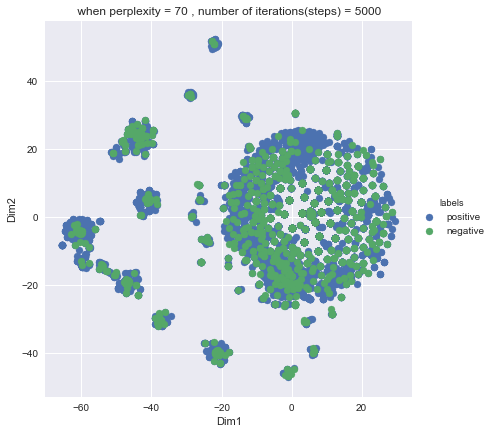

In [97]:
plt.title(" when perplexity = 70 , number of iterations(steps) = 5000 ")
plt.show()

 4 . **perplexity** = 100 , **number of iterations(steps) = 5000**
 
 Changing Perplexity
 
 Number of iterations -- unchanged

In [98]:
tsne_model_4 = TSNE(n_components=2,n_iter=5000,perplexity=100,random_state=0)

In [99]:
tsne_data_4 = tsne_model_4.fit_transform(data_10k.toarray()) #applying model to the data and transforming it 

tsne_data_stack_4 = np.vstack((tsne_data_4.T,score_labels_10k)).T #appending labels

tsne_df_4 = pd.DataFrame(tsne_data_stack_4,columns=("Dim1","Dim2","labels")) #creating dataframe

In [100]:
sns.FacetGrid(tsne_df_4,hue = 'labels',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()

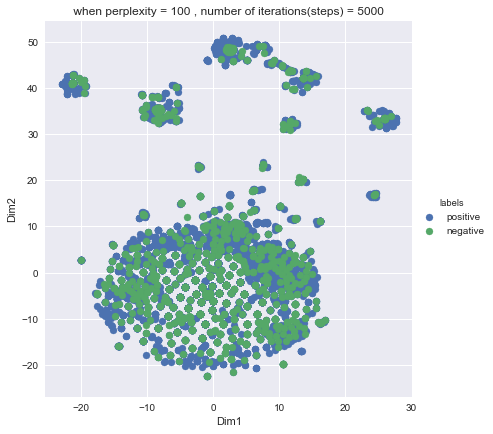

In [101]:
plt.title(" when perplexity = 100 , number of iterations(steps) = 5000 ")
plt.show()

5 . perplexity = 120 , number of iterations(steps) = 5000

Changing Perplexity

Number of iterations -- unchanged

In [102]:
tsne_model_5 = TSNE(n_components=2,n_iter=5000,perplexity=120,random_state=0)


In [103]:
tsne_data_5 = tsne_model_5.fit_transform(data_10k.toarray()) #applying model to the data and transforming it 

tsne_data_stack_5 = np.vstack((tsne_data_5.T,score_labels_10k)).T #appending labels

tsne_df_5 = pd.DataFrame(tsne_data_stack_5,columns=("Dim1","Dim2","labels")) #creating dataframe

In [104]:
sns.FacetGrid(tsne_df_5,hue = 'labels',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()

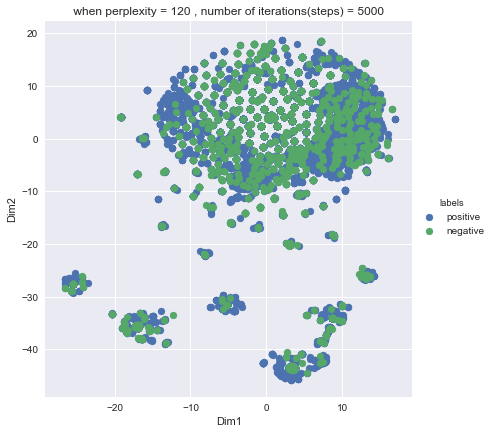

In [105]:
plt.title(" when perplexity = 120 , number of iterations(steps) = 5000 ")
plt.show()

### Observations:
    1. Even though we have tried for various perplexity and no.of.iterations. We haven't got any plot to visualize. There are many overlappings in all the plots. So, we can't predict or classify from these plots.
    2.
    3. It might be because of our sample as we have selected only few features to plot (we might haven't taken important or best features among all )
    4. We will try for other models and visualize whether we could get any insights or better visuals to predict or classify whether given review is positive or negative (which is our objective)

## tf-idf model

This is another algorithm by which we can convert text to vector

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vector = TfidfVectorizer()  

#not taking bi-grams because we have considered uni-grams in Bag_of_words
#comparison to be meaningful to some extent, we don't consider bi-grams

In [28]:
tf_idf_model = tf_idf_vector.fit_transform(reviews_final_dataset['Cleaned_text'])

In [29]:
tf_idf_model.shape

(364171, 71624)

In [184]:
#selecting only 1000 features out of 2923k dimensions (as we selected 1000 in BoW also) and also 10k rows(observations) from entire model

tf_idf_data_10k = tf_idf_model[:10000,:1000]

### Applying t-SNE 

In [185]:
t_sne_tfidf_model_1 = TSNE(n_components=2,n_iter=5000,perplexity=50,random_state=0)

In [186]:
tsne_data_tfidf_1 = t_sne_tfidf_model_1.fit_transform(tf_idf_data_10k.toarray()) #applying model to the data and transforming it 

tsne_data_tfidf_stack_1 = np.vstack((tsne_data_tfidf_1.T,score_labels_10k)).T #appending labels

tsne_df_tfidf_1 = pd.DataFrame(tsne_data_tfidf_stack_1,columns=("Dim1","Dim2","labels")) #creating dataframe

In [187]:
sns.FacetGrid(tsne_df_tfidf_1,hue='labels',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()

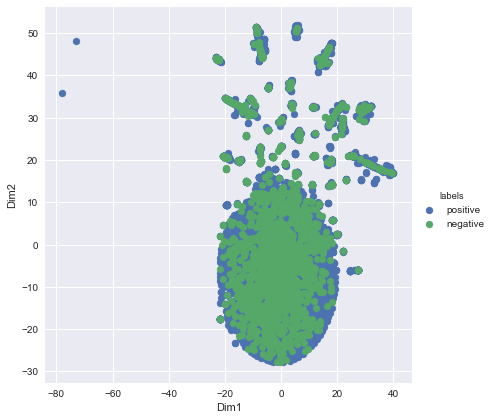

In [188]:
plt.show()

In [189]:
t_sne_tfidf_model_2 = TSNE(n_components=2,n_iter=5000,perplexity=70,random_state=0)

In [190]:
tsne_data_tfidf_2 = t_sne_tfidf_model_2.fit_transform(tf_idf_data_10k.toarray()) #applying model to the data and transforming it 

tsne_data_tfidf_stack_2 = np.vstack((tsne_data_tfidf_2.T,score_labels_10k)).T #appending labels

tsne_df_tfidf_2 = pd.DataFrame(tsne_data_tfidf_stack_2,columns=("Dim1","Dim2","labels")) #creating dataframe

In [191]:
sns.FacetGrid(tsne_df_tfidf_2,hue='labels',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()

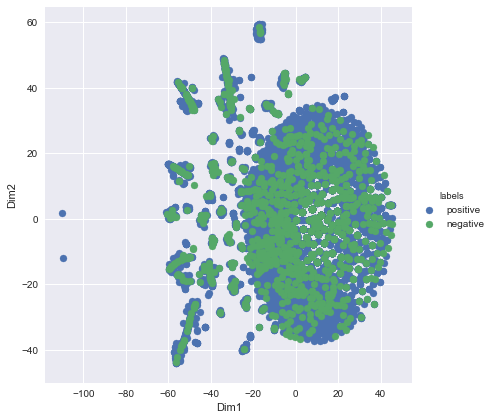

In [192]:
plt.show()

In [193]:
t_sne_tfidf_model_3 = TSNE(n_components=2,n_iter=5000,perplexity=100,random_state=0)

In [194]:
tsne_data_tfidf_3 = t_sne_tfidf_model_3.fit_transform(tf_idf_data_10k.toarray()) #applying model to the data and transforming it 

tsne_data_tfidf_stack_3 = np.vstack((tsne_data_tfidf_3.T,score_labels_10k)).T #appending labels

tsne_df_tfidf_3 = pd.DataFrame(tsne_data_tfidf_stack_3,columns=("Dim1","Dim2","labels")) #creating dataframe

In [195]:
sns.FacetGrid(tsne_df_tfidf_3,hue='labels',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()

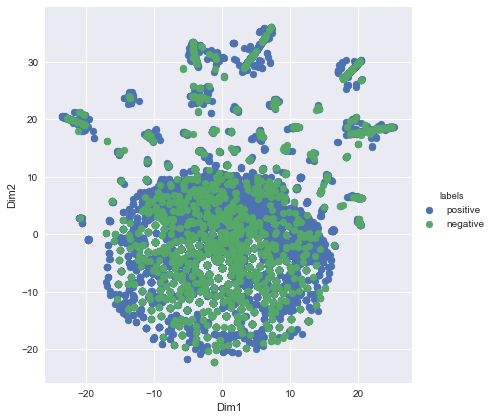

In [196]:
plt.show()

#### Observation:
1.Even though we have changed the technique from 'Bag of Words'  to 'tf-idf' to convert word to vector. There is no significant change in plots

2.From this plots, we can't draw any insights as both classes (positive as well as negative) are overlapping.

### Word2Vec

In [30]:
import gensim
list_of_sentences = []
for sentence in reviews_final_dataset['Cleaned_text'].values:
    list_of_sentences.append(sentence.split())
  

C:\Users\CHAMANTH MVS\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [31]:
#training the model with word2Vec #size-dimensionality #min_count-no.of.minimum repetitions #workers-no.of.cores
word2Vec_model =  gensim.models.Word2Vec(list_of_sentences,min_count=5,size=30,workers=4)

In [32]:
words = list(word2Vec_model.wv.vocab)

In [33]:
print(len(words))

21938


In [34]:
list_of_sentences[:2]

[['witti',
  'littl',
  'book',
  'make',
  'son',
  'laugh',
  'loud',
  'recit',
  'car',
  'drive',
  'along',
  'alway',
  'sing',
  'refrain',
  'hes',
  'learn',
  'whale',
  'india',
  'droop',
  'love',
  'new',
  'word',
  'book',
  'introduc',
  'silli',
  'classic',
  'book',
  'will',
  'bet',
  'son',
  'still',
  'abl',
  'recit',
  'memori',
  'colleg'],
 ['grew',
  'read',
  'sendak',
  'book',
  'watch',
  'realli',
  'rosi',
  'movi',
  'incorpor',
  'love',
  'son',
  'love',
  'howev',
  'miss',
  'hard',
  'cover',
  'version',
  'paperback',
  'seem',
  'kind',
  'flimsi',
  'take',
  'two',
  'hand',
  'keep',
  'page',
  'open']]

### AvgWord2Vec

In [202]:
# average Word2Vec
# compute average word2vec for each review.
sentence_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in list_of_sentences: # for each review/sentence (which is computed while computing Word2Vec)
    sentence_vector = np.zeros(30) # as word vectors are of zero length '30 because while defining a model , 
                                                                                #            we specified no of dimensions as 30
    count_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence: # for each word in a review/sentence
        try:
            vector = word2Vec_model.wv[word] #creating a vector for each word
            sentence_vector += vector #storing each created vector in a sentence vector list. for ex- in sentence if there are
                                      # 5words, then 5 vectors will be created as we know for each word, one vector is created.
            count_words += 1 #counting the no.of words in sentence as we need to compute as it is avg word2vec
        except:
            pass
    sentence_vector /= count_words #sentence_vector = (w2v(w1)+w2v(w2)+w2v(w3)+...n)
                                  #count_words = (1/n)
                                  # avgWord2Vec = [(1/n)*(w2v(w1)+w2v(w2)+w2v(w3)+...n)] #n means n words...
    sentence_vectors.append(sentence_vector)


C:\Users\CHAMANTH MVS\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [203]:
len(sentence_vectors) #no of elements in list = 364171

364171

In [204]:
len(sentence_vector) #length of each vector (dimension of each vector)

30

In [205]:
type(vector)

numpy.ndarray

In [206]:
len(vector)

30

In [207]:
avg_word2vec_array = np.array(sentence_vectors)

In [208]:
avg_word2vec_array.shape

(364171, 30)

In [209]:
avg_word2vec_array

array([[ 0.33312078,  0.56623972, -0.05423722, ..., -0.66513087,
        -0.14319485,  0.67943761],
       [ 0.31864315,  0.14291079,  0.66822099, ..., -0.40806686,
        -0.36133926, -0.5829333 ],
       [ 0.84253198,  1.50631696,  0.44843814, ..., -0.63714143,
        -0.0176167 , -0.61973083],
       ...,
       [ 0.17664729,  0.32847131, -0.08176449, ...,  0.10372829,
         0.38889707, -0.63558624],
       [ 0.33917115,  1.70803482, -0.02276732, ..., -0.84874861,
         0.35196838, -0.88650871],
       [ 1.24492172,  1.96083636, -0.76894744, ..., -0.38370597,
        -0.69527593,  0.34622118]])

In [210]:
avg_word2vec_array_10_k = avg_word2vec_array[:10000]

In [211]:
avg_word2vec_array_10_k

array([[ 0.33312078,  0.56623972, -0.05423722, ..., -0.66513087,
        -0.14319485,  0.67943761],
       [ 0.31864315,  0.14291079,  0.66822099, ..., -0.40806686,
        -0.36133926, -0.5829333 ],
       [ 0.84253198,  1.50631696,  0.44843814, ..., -0.63714143,
        -0.0176167 , -0.61973083],
       ...,
       [-0.12574364,  0.174518  ,  0.20515379, ...,  0.40965195,
        -1.03631686, -0.93300865],
       [-0.90185603,  1.50788091, -0.16580278, ..., -0.26112077,
         0.87452519, -1.41094049],
       [-0.22122251,  0.56674144,  0.23413041, ...,  0.63319641,
         0.22427047, -1.28158407]])

### Applying t-SNE

In [212]:
tsne_word2vec_model_1 = TSNE(n_components=2,n_iter=1000,perplexity=50,random_state=0)

In [213]:
tsne_word2vec_data_1 = tsne_word2vec_model_1.fit_transform(avg_word2vec_array_10_k)

In [214]:
tsne_data_word2vec_stack_1 = np.vstack((tsne_word2vec_data_1.T,score_labels_10k)).T #appending labels

tsne_df_w2v_1 = pd.DataFrame(tsne_data_word2vec_stack_1,columns=("Dim1","Dim2","labels")) #creating dataframe

In [215]:
sns.FacetGrid(tsne_df_w2v_1,hue='labels',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()

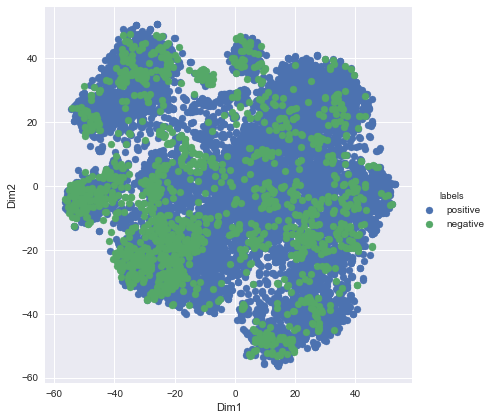

In [216]:
plt.show()

In [217]:
tsne_word2vec_model_2 = TSNE(n_components=2,n_iter=5000,perplexity=50,random_state=0)

In [218]:
tsne_word2vec_data_2 = tsne_word2vec_model_2.fit_transform(avg_word2vec_array_10_k)

tsne_data_word2vec_stack_2 = np.vstack((tsne_word2vec_data_2.T,score_labels_10k)).T #appending labels

tsne_df_w2v_2 = pd.DataFrame(tsne_data_word2vec_stack_2,columns=("Dim1","Dim2","labels")) #creating dataframe

In [219]:
sns.FacetGrid(tsne_df_w2v_2,hue='labels',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()

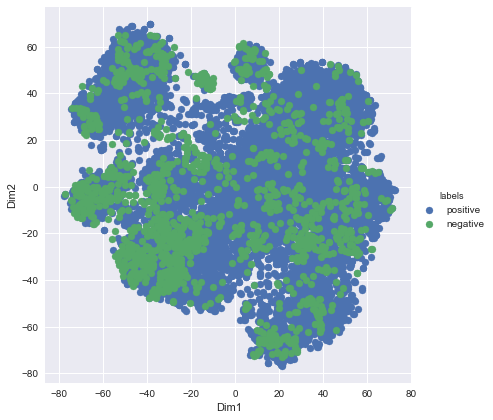

In [220]:
plt.show()

In [221]:
tsne_word2vec_model_3 = TSNE(n_components=2,n_iter=5000,perplexity=70,random_state=0)

In [222]:
tsne_word2vec_data_3 = tsne_word2vec_model_3.fit_transform(avg_word2vec_array_10_k)

tsne_data_word2vec_stack_3 = np.vstack((tsne_word2vec_data_3.T,score_labels_10k)).T #appending labels

tsne_df_w2v_3 = pd.DataFrame(tsne_data_word2vec_stack_3,columns=("Dim1","Dim2","labels")) #creating dataframe

In [223]:
sns.FacetGrid(tsne_df_w2v_3,hue='labels',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()

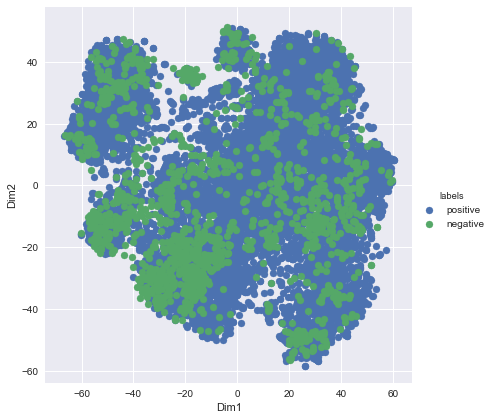

In [224]:
plt.show()

In [225]:
tsne_word2vec_model_4 = TSNE(n_components=2,n_iter=5000,perplexity=100,random_state=0)

In [226]:
tsne_word2vec_data_4 = tsne_word2vec_model_4.fit_transform(avg_word2vec_array_10_k)

tsne_data_word2vec_stack_4 = np.vstack((tsne_word2vec_data_4.T,score_labels_10k)).T #appending labels

tsne_df_w2v_4 = pd.DataFrame(tsne_data_word2vec_stack_4,columns=("Dim1","Dim2","labels")) #creating dataframe

In [227]:
sns.FacetGrid(tsne_df_w2v_4,hue='labels',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()

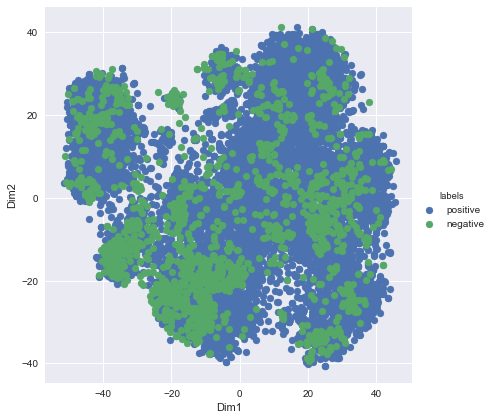

In [228]:
plt.show()

### tf-idf Word2Vec

In [36]:
#selecting only 25k list_of_sentences
list_of_sent_25k = list_of_sentences[:25000]

In [40]:
# TF-IDF weighted Word2Vec
tfidf_features = tf_idf_vector.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sentence_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sentence in list_of_sent_25k: # for each review/sentence
    sentence_vector = np.zeros(30) # as word vectors are of zero length
    weight_sum = 0; # num of words with a valid vector in the sentence/review
    for word in sentence: # for each word in a review/sentence
        try:
            vector = word2Vec_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = tf_idf_model[row, tfidf_features.index(word)]
            sentence_vector += (vector * tfidf)
            weight_sum += tfidf
        except:
            pass
    sentence_vector /= weight_sum
    tfidf_sentence_vectors.append(sentence_vector)
    row += 1
    


In [41]:
len(tfidf_sentence_vectors)

25000

In [42]:
tfidf_sentence_vectors

[array([-0.29447697, -0.37475762, -0.07811597,  0.21491891,  0.38164123,
        -0.13733314,  0.06932898, -0.57611035,  0.17923351,  0.42227636,
         0.71602257,  0.66517443,  0.35485237, -0.03911221, -0.616076  ,
        -0.36180546, -1.00064272,  0.95192618,  0.38884873,  0.94761823,
         0.51203376, -0.05240086,  0.11762508,  0.15295851, -0.38127119,
        -1.2856076 , -0.04562196,  0.80162638,  0.11553039,  0.23638295]),
 array([-0.03478638, -0.07255674,  0.31082957,  0.47449133,  0.09354785,
         0.78667819, -0.5295016 , -0.66511578, -0.24683076, -0.50561226,
         0.54617222,  0.49801011,  0.19137246, -0.50518236,  0.79909365,
        -0.07020305, -0.42667481,  0.26211042,  0.50335751,  0.88888338,
        -0.26310341,  0.59926985, -0.02179225,  0.29820244, -0.1872544 ,
        -0.25854563, -0.52809272,  0.60555819,  0.66056505,  0.31243335]),
 array([-0.69822343, -0.55100968,  0.09051812,  0.11887061, -0.24281261,
         0.5057247 , -1.11693763, -0.91292914, 

In [43]:
len(tfidf_sentence_vectors[0])

30

In [44]:
tfidf_w2v_array = np.array(tfidf_sentence_vectors)

In [45]:
tfidf_w2v_array.shape

(25000, 30)

In [46]:
tfidf_w2v_array

array([[-0.29447697, -0.37475762, -0.07811597, ...,  0.80162638,
         0.11553039,  0.23638295],
       [-0.03478638, -0.07255674,  0.31082957, ...,  0.60555819,
         0.66056505,  0.31243335],
       [-0.69822343, -0.55100968,  0.09051812, ...,  0.0834416 ,
        -0.15888057,  0.41217888],
       ...,
       [ 0.31411171,  1.0850026 , -0.08220838, ...,  0.45084794,
         0.32891406, -0.95680441],
       [-0.06677333, -0.20529603, -1.59022386, ...,  0.00524039,
         1.02506949, -0.61532825],
       [-0.61693562, -1.94330959, -0.57586713, ...,  0.21216389,
        -0.36961225,  0.50757053]])

In [47]:
tfidf_w2v_array_10k = tfidf_w2v_array[:10000]

In [48]:
tfidf_w2v_array_10k.shape

(10000, 30)

In [49]:
tfidf_w2v_array_10k

array([[-0.29447697, -0.37475762, -0.07811597, ...,  0.80162638,
         0.11553039,  0.23638295],
       [-0.03478638, -0.07255674,  0.31082957, ...,  0.60555819,
         0.66056505,  0.31243335],
       [-0.69822343, -0.55100968,  0.09051812, ...,  0.0834416 ,
        -0.15888057,  0.41217888],
       ...,
       [ 1.07354982,  0.65871229,  0.26744641, ...,  0.59274156,
         1.18712325, -0.16396485],
       [ 0.12384239, -0.00347132, -0.49518555, ...,  0.6290452 ,
         0.28412287,  0.69894342],
       [ 0.49793155,  0.41588846, -0.05030878, ..., -0.14875478,
         0.47879836,  0.13881455]])

### Applying TSNE

In [52]:
tfidf_w2v_model_1 = TSNE(n_components=2,n_iter=1000,perplexity=50,random_state=0)

In [53]:
tfidf_w2v_data = tfidf_w2v_model_1.fit_transform(tfidf_w2v_array_10k)

In [56]:
tfidf_w2v_data_stack = np.vstack((tfidf_w2v_data.T,score_labels_10k)).T

tfidf_w2v_df = pd.DataFrame(tfidf_w2v_data_stack,columns=("Dim1","Dim2","labels"))

In [59]:
sns.FacetGrid(tfidf_w2v_df,hue='labels',size = 6).map(plt.scatter,'Dim1','Dim2').add_legend()

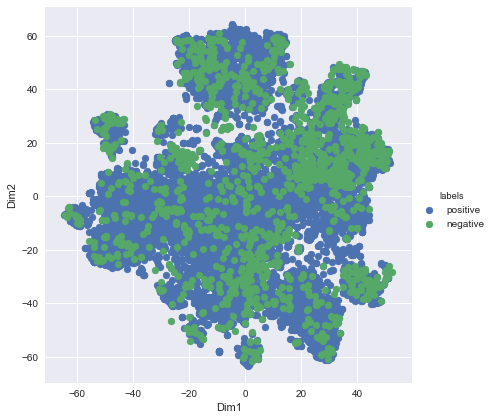

In [60]:
plt.show()

In [61]:
tfidf_w2v_model_2 = TSNE(n_components=2,n_iter=5000,perplexity=50,random_state=0)

In [63]:
tfidf_w2v_data = tfidf_w2v_model_2.fit_transform(tfidf_w2v_array_10k)

tfidf_w2v_data_stack = np.vstack((tfidf_w2v_data.T,score_labels_10k)).T

tfidf_w2v_df = pd.DataFrame(tfidf_w2v_data_stack,columns=("Dim1","Dim2","labels"))


In [64]:
sns.FacetGrid(tfidf_w2v_df,hue='labels',size = 6).map(plt.scatter,'Dim1','Dim2').add_legend()

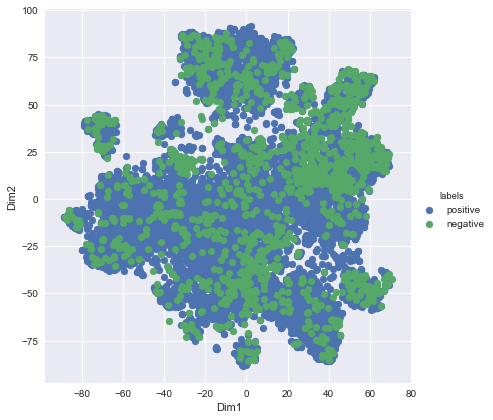

In [65]:
plt.show()

In [66]:
tfidf_w2v_model_3 = TSNE(n_components=2,n_iter=5000,perplexity=70,random_state=0)

In [67]:
tfidf_w2v_data = tfidf_w2v_model_3.fit_transform(tfidf_w2v_array_10k)

tfidf_w2v_data_stack = np.vstack((tfidf_w2v_data.T,score_labels_10k)).T

tfidf_w2v_df = pd.DataFrame(tfidf_w2v_data_stack,columns=("Dim1","Dim2","labels"))


In [68]:
sns.FacetGrid(tfidf_w2v_df,hue='labels',size = 6).map(plt.scatter,'Dim1','Dim2').add_legend()

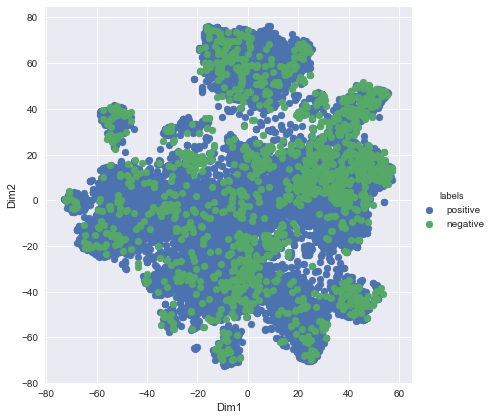

In [69]:
plt.show()

In [70]:
tfidf_w2v_model_4 = TSNE(n_components=2,n_iter=5000,perplexity=100,random_state=0)

In [71]:
tfidf_w2v_data = tfidf_w2v_model_4.fit_transform(tfidf_w2v_array_10k)

tfidf_w2v_data_stack = np.vstack((tfidf_w2v_data.T,score_labels_10k)).T

tfidf_w2v_df = pd.DataFrame(tfidf_w2v_data_stack,columns=("Dim1","Dim2","labels"))


In [72]:
sns.FacetGrid(tfidf_w2v_df,hue='labels',size = 6).map(plt.scatter,'Dim1','Dim2').add_legend()

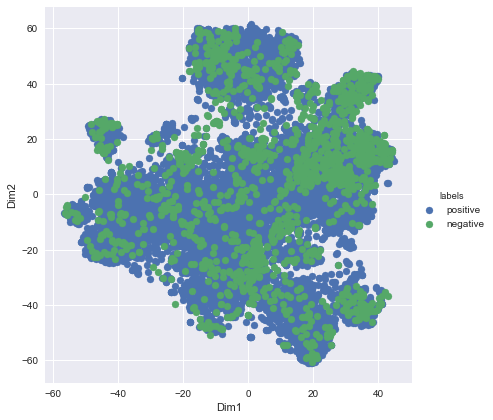

In [73]:
plt.show()

#### Observation related to word2vec methods:
1.We have used avg-weighted Word2vec as well as tf-idf weighted word2vec to plot the reviews. 

2.Even in these plots also there is a lot of overlapping , so any conclusions from these plots can't be drawn.

3.We can't compare these word2vec model plots with other 'text-to-vector' changing methods because data used to plot these are diffrent where we have taken first 10000 for BoW,tf-idf whereas we have used very less amount of data to plot word2vec model because of lack of hardware requirements. So,here we shouldn't compare "BoW,tf-idf plots" with "word2vec" model plots.




### Final Observation:
1.All the plots generated from 'BoW,tf-idf,Word2Vec' are overlapping, we can't draw any insights from these plots.

2.This might be because 

      Our data (it is Imbalanced data) where one class(positive class) is highly dominating the other class(negative class)

      We haven taken only subset of data(sample). We haven't used any proper sampling method to sample the data.
